# What sort of films should we produce?
## Darryn J.
___

Blog:

Pace: flex

Instructor: Morgan Jones

Date: 4 - 10 - 24

___
## Overview

To start off this project, I first load in some usefull tools such as `matplotlib` to allow us to create graphs, or `pandas` to help with data cleaning. After this i load in the data sets, `bom.movie_gross.csv.gz` and `im.db.unzipped`,and assign it to `df` and `df2` respectively. Here is a quick overview of what takes place in this notebook -

- OVERVIEW
    - An index of what this notebook contains
- BUSINESS UNDERSTANDING
    - What data is being used and why
- DATA DISTRIBUTION
    - How is the data disributed within this dataframe
- METRICS
    - How will we measure the success of a film
- FUNCTIONS
    - Functions created for ease of use
- DATA MANIPULATION
    - Simple changes to data to make information gathering easier
- Everything Financial
    - What can we do to maximise revenue
        - budget and total revenue
        - ROI
        - Domestic vs. Foreign gross
- GENRE
    - How does genre effect the success of a film
        - Type of story
        - Ratings per genre
- THEATRICAL RELEASE TIME
    - When throughout the year should we release our films
- Recommendation
    - Budget
    - Genre
    - Release time
- Summary
    - TL;DR

___
## Business Understanding

Using the `bom.movie_gross.csv.gz` data set, along with `im.db.unzipped` SQL file, we will look into what the current top films by revenue and ratings are and what decisions on film types we should make as a company to maximise success.

___
## Data Distribution

Here we will look at the disribution of the 2 data sets, revenue and rating.

Utilized function:

`year_gross`

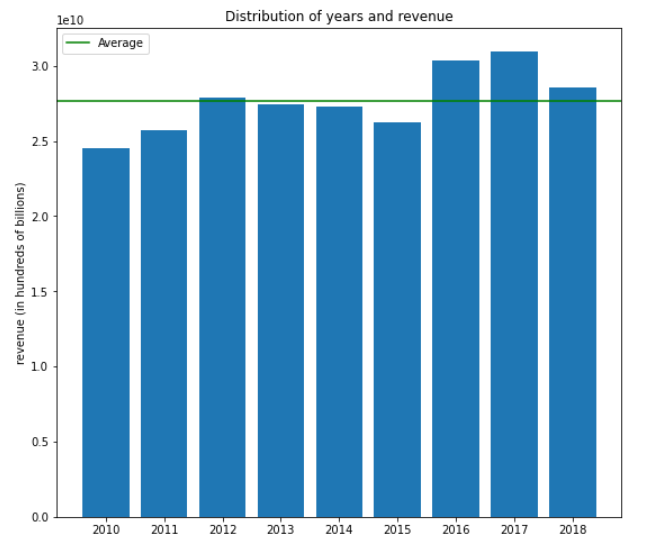

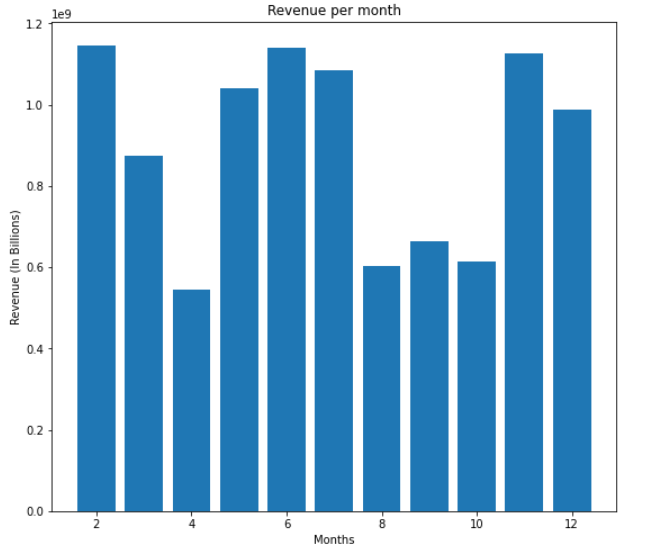

Utilized function:

`df2_avg_rating`


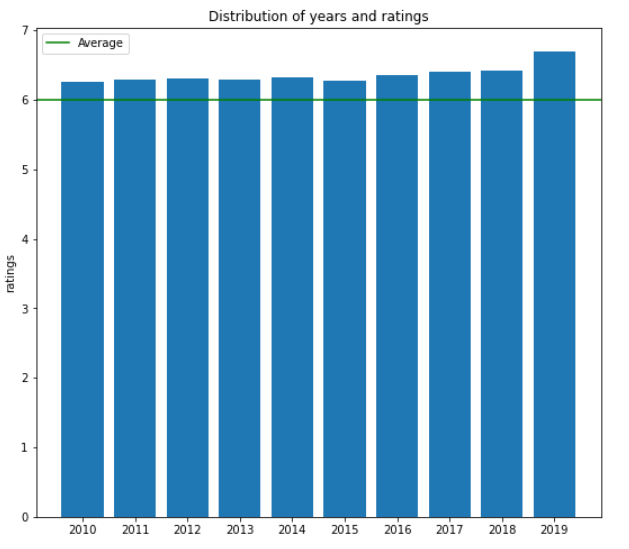

___
## Metrics

- Revenue
    - what can we do to maximise revenue


- Genre
    - How does genre effect film performance


- Theatrical release time
    - When throughout the year should we release our films

___
## Functions

Here we use `def` or define, to create several code blocks that automatically exicute several lines of code when given specific information. These are called `functions`. This is done to gather information for several variables without re-writting the code each time. These functions gather this information -

- `get_g_rating`
    - gathers the average rating for a specified genre


- `year_gross`
    - finds the gross revinue for a given year


- `df2_avg_rating`
    - finds the average rating for a given year

In [1]:
# create function to gather the average for a specified genre

def get_g_rating(genre):
    g_list = df2[df2['genres'] == genre] # only use entries that are the specified genre
    sum_rating = sum(g_list['averagerating']) # sum all ratings together
    avg = sum_rating / len(g_list['averagerating']) # devide the sum of the ratings by the total entry count
    rounded = round(avg, 2) # round
    return rounded # output

In [2]:
# create function to find the gross revinue for a given year

def year_gross(year):
    year_list = df[df['year'] == year] # only use entires that are the specified year
    gross = sum(year_list['total_gross']) # add all income togehter 
    return gross # output

In [3]:
# create finction to find the average rating for a given year

def df2_avg_rating(year):
    year_list = df2[df2['start_year'] == year] # only use entries that are specified year
    sum_rating = sum(year_list['averagerating']) # add togehter all ratings
    avg_rating = sum_rating / len(year_list['averagerating']) # devide to get average
    rounded = round(avg_rating, 2) # round
    return rounded # output

In [4]:
# create function to find the return on investment (ROI) for given films 
def roi_finder(df):
    df = df
    for ind in df.index: # for loop to iterate through each row of info
        cost = df['budget'] # find cost of each film
        profit = df['total_revenue'] # find profit for each film
        return ((profit - cost) / cost) / 10 # ROI formula and output

___
# Data Manipulation

Here we load in some usefull libraries that make data analysis and gathering easier and quicker

In [6]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
%matplotlib inline

Load in `bom.movie_gross.csv.gz` and `movie_dates_and_budgets.csv` data sets and assign to df and df_scraped respectively. This is the data we will use to look into the gross revenue and budgets for individual films.

Scraped data is data taken from websites. The scraped data in this notebook is from [The-Numbers.com. ](https://www.the-numbers.com/)

In [7]:
df = pd.read_csv('bom.movie_gross.csv.gz') # load in dataset

In [8]:
df.head() # veiw first five of dataframe

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
df_scraped = pd.read_csv('movie_dates_and_budgets.csv') # load in scraped data

In [10]:
df_scraped.head() # view first five of dataframe

,data,data 2,tablescraper-selected-row,data 3
0,1,"Apr 26, 2019",Avengers: Endgame,"$400,000,000"
1,2,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000"
2,3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000"
3,4,"Jun 12, 2015",Jurassic World,"$215,000,000"
4,5,"Jul 19, 2019",The Lion King,"$260,000,000"


We can see the scraped data set has some names for columns that arent quite appropriate. Lets go ahead and make them a little more sensible.

In [11]:
df_scraped.rename(columns = {'data' : 'index'}, inplace = True) # rename data column name to index

In [12]:
df_scraped.rename(columns = {'data 2' : 'date'}, inplace = True) # rename data 2 column name to date

In [13]:
df_scraped.rename(columns = {'tablescraper-selected-row' : 'title'}, inplace = True) # rename tablescraper-selected-row column 
# to title

In [14]:
df_scraped.rename(columns = {'data 3' : 'budget'}, inplace = True) # rename data 3 column to budget

In [15]:
df_scraped['date'] = pd.to_datetime(df_scraped['date']) # change date column form object to datetime

In [16]:
df_scraped.head() # view first five of dataframe

,index,date,title,budget
0,1,2019-04-26,Avengers: Endgame,"$400,000,000"
1,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000"
2,3,2018-04-27,Avengers: Infinity War,"$300,000,000"
3,4,2015-06-12,Jurassic World,"$215,000,000"
4,5,2019-07-19,The Lion King,"$260,000,000"


Next, we will create a connection to a SQL file (`im.db.unzipped`) to gather some infomation regarding genre and rating for films.

In [17]:
conn = sqlite3.connect('im.db.unzipped') # load in sql file

In [18]:
# assign sql file to df2 to make it easier to read and access
df2 = pd.read_sql('''
select *
from movie_basics
join movie_ratings
using (movie_id)
''', conn) 

In [19]:
df2.head() # view first five of dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Lets rename `primary_title` to `title` so we can merge this table with another table based on the title column.

In [20]:
df2.rename(columns = {'primary_title' : 'title'}, inplace = True) # change primary_title column to title

This code snipped below simply alters the way pandas displays numbers, changing it from displaying a large amount of 0's after the decimal, to only displaying 2 places after the decimal.

In [21]:
pd.options.display.float_format = '{:.2f}'.format# change the way pandas displays numbers

Lets quicky take a glance at how the dataframe is set up. Here we can see an interesting data type, with `foreign_gross` being displayed as an object, rather than an intiger or a float. I wonder why that is? Lets do some digging to see if we can find out why.

- String
    - stored information. numbers can be considered a string but can not be added to other numbers
- Intiger
    - Any real number
- Float
    - A number that has a decimal 

In [22]:
df.info() # view some info about the data. This is called metadata.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Firstly, lets replace all `NULL` values with 0.0, and 'unk' for strings, as this will make data minipulation easier in the future

In [23]:
df['foreign_gross'].fillna(0.0, inplace = True) # fill foreign_gross NULL values with 0.0

In [24]:
df['domestic_gross'].fillna(0.0, inplace = True) # fill domestic_gross NULL vales with 0.0

In [25]:
df2['genres'].fillna('unk', inplace = True) # fill genres NULL values with unk

In [26]:
df['year'].fillna('unk', inplace = True) # fill year NULL values with unk

Below, we can see what happens when we try to change the data type from object to float. We recieve an error. Upon looking into the error, we see that at the bottom is says *ValueError: could not convert string to float: '1,131.6'*. This is a great hint as to why this data was put in as an object, instead of a float. Its because commas can't be numbers! so lets remove commas from anywhere that has them and see if we can then convert the data to float.

Screenshot of the error, so that the code can still run past this code block

`df['foreign_gross'].astype(float)`


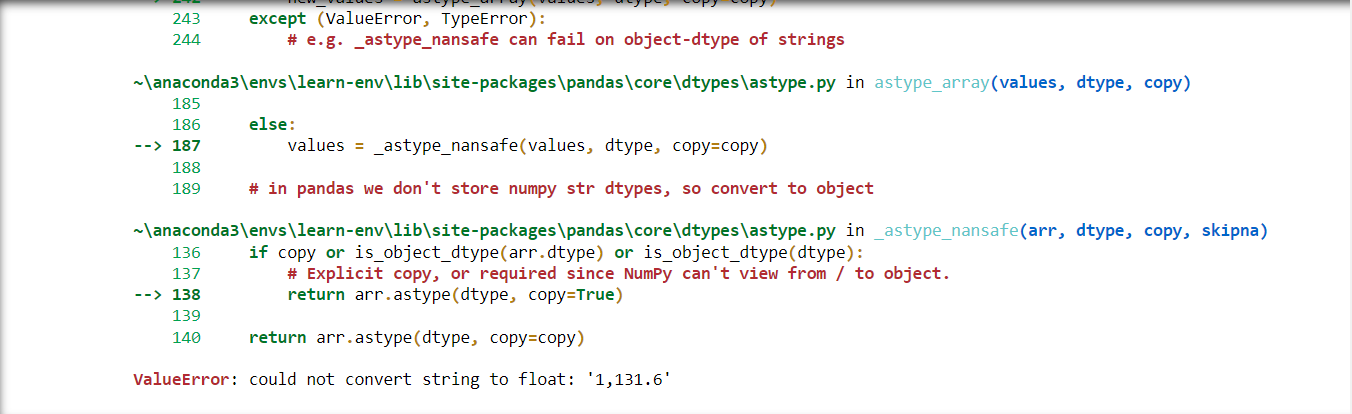

In [27]:
df[df['foreign_gross'].str.contains(',') == True] # show what entries have a comma 

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.00,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.00,"1,019.4",2015
1874,Furious 7,Uni.,353000000.00,"1,163.0",2015
2760,The Fate of the Furious,Uni.,226000000.00,"1,010.0",2017
3079,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018


Here we can see there's actually 5 entries that have commas in them. Now lets replace all commas with empty space

In [28]:
df['foreign_gross'] = df['foreign_gross'].str.replace(',','') # replace commas with empty space

Change the data type to float

In [29]:
df['foreign_gross'] = df['foreign_gross'].astype(float) # convert column to float 

And finally we can now add together `domestic_gross` and `foreign_gross` to get `total_gross`

In [30]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross'] # add together domestic_gross and foreign_gross in new column 
# total_gross

We will also start merging our datafames together at this point, so we can start to have all of our data located in one dataframe. 

In [31]:
df3 = df.merge(df2, how = 'inner') # merge together the origion datafame with df2

In [32]:
df4 = df3.merge(df_scraped, how = 'inner') # merge df3 with df_scraped

In [33]:
df4['budget'].fillna(0.0, inplace = True) # fill budget NULL values with 0.0

In [34]:
df4['budget'] = df4['budget'].str.replace(',','') # replace commas with empty space 

In [35]:
df4['budget'] = df4['budget'].str.replace('$','') # replace dollar sign with empty space 

In [36]:
df4['budget'] = df4['budget'].astype(float) # turn budget column into float 

In [37]:
df4.info() # check metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            75 non-null     object        
 1   studio           75 non-null     object        
 2   domestic_gross   75 non-null     float64       
 3   foreign_gross    72 non-null     float64       
 4   year             75 non-null     int64         
 5   total_gross      72 non-null     float64       
 6   movie_id         75 non-null     object        
 7   original_title   75 non-null     object        
 8   start_year       75 non-null     int64         
 9   runtime_minutes  75 non-null     float64       
 10  genres           75 non-null     object        
 11  averagerating    75 non-null     float64       
 12  numvotes         75 non-null     int64         
 13  index            75 non-null     int64         
 14  date             75 non-null     datetime64[

___
# Everything financial

## Budget

Budget is one half of the equation for total revenue, the other half being gross income. Lets look into how some popular films managed their budget and see if we can learn from them.

In [38]:
df4['total_revenue'] = df4['total_gross'] - df4['budget'] # create column for total revenue by subtracting total gross from budget
df4['total_revenue'].fillna(0.0, inplace = True) # remove null values from total_revenue 
df4['ROI'] = ((df4['total_revenue'] - df4['budget']) / df4['budget']) / 10 # create ROI column
df5 = df4.drop_duplicates(subset = 'title') # remove duplicate entries
top_25_budget = df5.sort_values(by = 'total_revenue', ascending = False)[:25] # create sorted list of the top 25 by revenue
top_25_budget.head() # view first five of dataframe

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
69,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148,10,2018-02-16,200000000.00,1147000000.00,0.47
70,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125,13,2018-06-22,170000000.00,1139500000.00,0.57
16,Frozen,BV,400700000.00,875700000.00,2013,1276400000.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311,14,2013-11-22,150000000.00,1126400000.00,0.65
39,Minions,Uni.,336000000.00,823400000.00,2015,1159400000.00,tt2293640,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,193917,19,2015-07-10,74000000.00,1085400000.00,1.37
71,Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00,tt3606756,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,203510,16,2018-06-15,200000000.00,1042800000.00,0.42


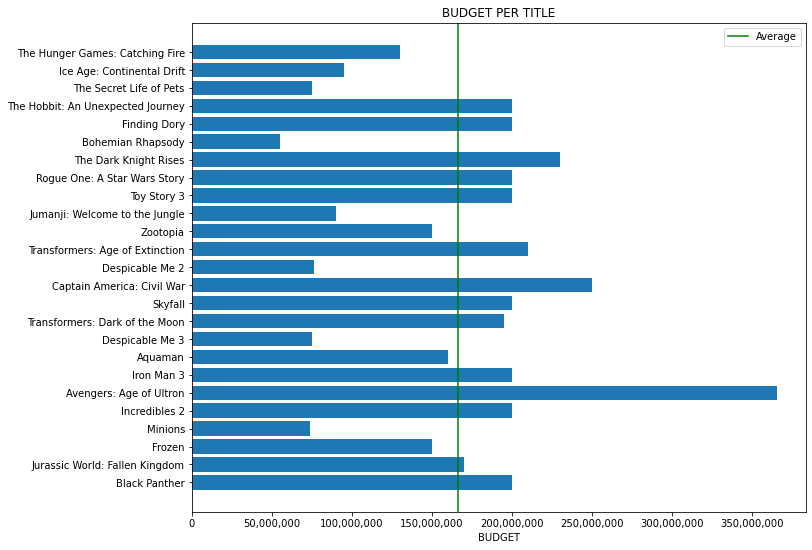

In [39]:
fig, ax = plt.subplots(figsize = (11, 9)) # create figure for plot

x = top_25_budget['budget'] # assign variable for budget numbers
y = top_25_budget['title'] # assign variable for titles
height_mean = round(sum(x) / len(x)) # find average of budget
ax.axvline(height_mean, color = 'green') # assign verticle line to average
ax.set_xlabel('BUDGET') # label axis
ax.barh(y,x) # create graph
ax.set_title('BUDGET PER TITLE') # title plot
plt.legend(['Average']) # create legend
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show(); # output

This chart is orderd by revenue, so black panther at the bottom has the highest revenue, but a budget nearing the average. This is extremely optimal, as a low budget plus high gross income equals fantastic revenue. Lets look into some graphs on revenue, and mix these graphs together to get a more complete picture.

## Revenue

Revenue is the most important metric here, and we get this number by subtracting budget from total gross, giving us the total revenue.  

In [40]:
df5.head() # view first five of dataframe

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00,tt0435761,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",8.30,682218,30,2010-06-18,200000000.00,867000000.00,0.33
1,Inception,WB,292600000.00,535700000.00,2010,828300000.00,tt1375666,Inception,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066,59,2010-07-16,160000000.00,668300000.00,0.32
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00,tt0892791,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",6.30,167532,74,2010-05-21,165000000.00,587600000.00,0.26
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,698500000.00,tt1325004,The Twilight Saga: Eclipse,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733,83,2010-06-30,68000000.00,630500000.00,0.83
4,Transformers: Dark of the Moon,P/DW,352400000.00,771400000.00,2011,1123800000.00,tt1399103,Transformers: Dark of the Moon,2011,154.00,"Action,Adventure,Sci-Fi",6.20,366409,24,2011-06-29,195000000.00,928800000.00,0.38


Lets see what the top 25 by total revenue look like.

In [41]:
top_25 = df5.sort_values(by = 'total_revenue', ascending = False)[:25] # create sorted list of top 25 by revenue

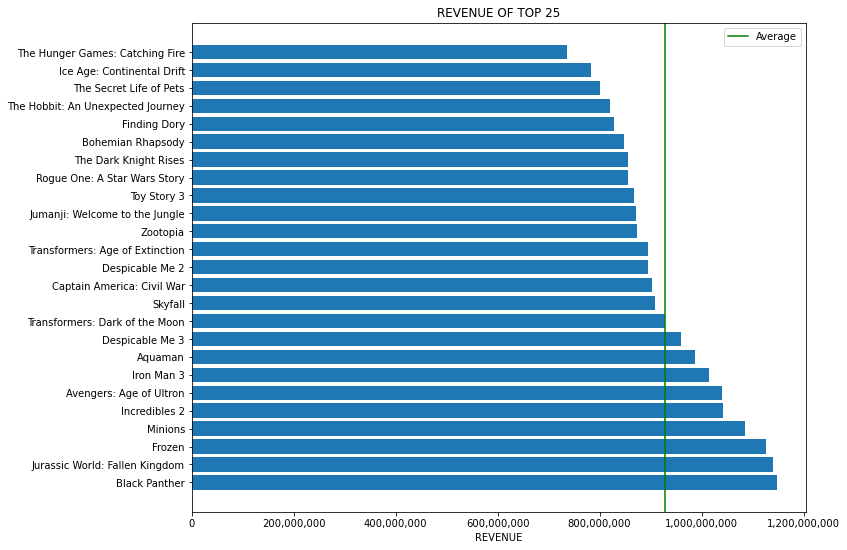

In [42]:
fig, ax = plt.subplots(figsize = (11, 9)) # create figure for plot

x = top_25['total_revenue'] # assign variable for total revenue numbers
y = top_25['title'] # assign variable for title names
height_mean = round(sum(x) / len(x)) # find average for total_revenue
ax.axvline(height_mean, color = 'green') # place average line
ax.set_xlabel('REVENUE') # set axis name
ax.barh(y,x) # create plot
ax.set_title('REVENUE OF TOP 25') # title plot
plt.legend(['Average']) # create legend
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show(); # output

We can see that Black Panther has the highest total revenue, at $1,147,000,000, or 1.14 Billion! 
The average for the top 25 by revenue is 928 million. Still a respectable number, but what can we do to try to push towards the black panther side of the chart?

## Budget and Revenue

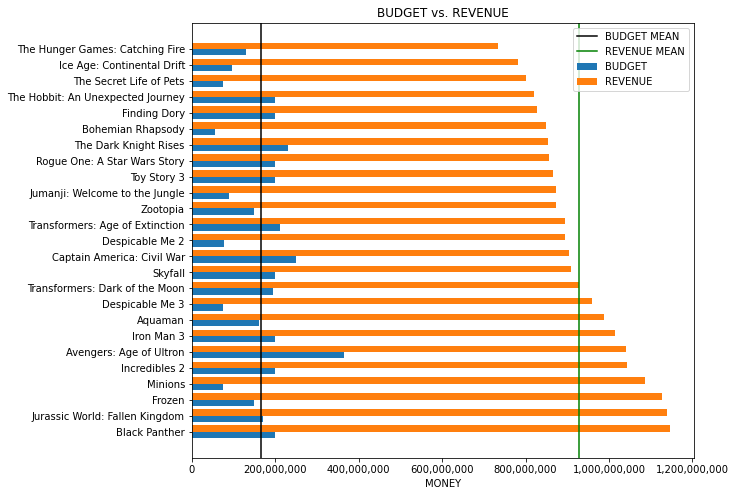

In [43]:
fig, ax = plt.subplots(figsize = (9,8)) # create figure for plot

y1 = top_25_budget['budget'] # assign variable for budget numbers
y2 = top_25_budget['total_revenue'] # assign variable for total revenue numbers
x = np.arange(len(y1)) # create evenly spaced locations for variables to be placed
width = 0.40 # lower width of bars so they dont overlap
plt.barh(x-0.2, y1,width) # place y1 bars
plt.barh(x+0.2,y2,width) # place y2 bars
y1_mean = round(sum(y1) / len(y1)) # find average of y1
ax.axvline(y1_mean, color = 'black') # place y1 average
y2_mean = round(sum(y2) / len(y2)) # find average of y2
ax.axvline(y2_mean, color = 'green') # plave y2 average
plt.yticks(x, top_25_budget['title']) # place film titles
ax.set_title('BUDGET vs. REVENUE') # title plot
ax.set_xlabel('MONEY') # show scale for reference
plt.legend(['BUDGET MEAN','REVENUE MEAN','BUDGET', 'REVENUE']) # label and place legend
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show(); # output

Here we can see that higher budget doesn't necessarily equal more revenue. It appears that staying near the average of 166 million results in the highest potential revenue, as this maximises revenue and minimises money spent on the product.

## Return on Investment

Return of Investment or ROI, is a metric used to understand the the profitability of a product. 
The formula is (profit - cost) / cost. This outputs a number where the bigger the better. Lets look into a graph that shows the ROI of our top films.

Utilized Functions:

`roi_finder`

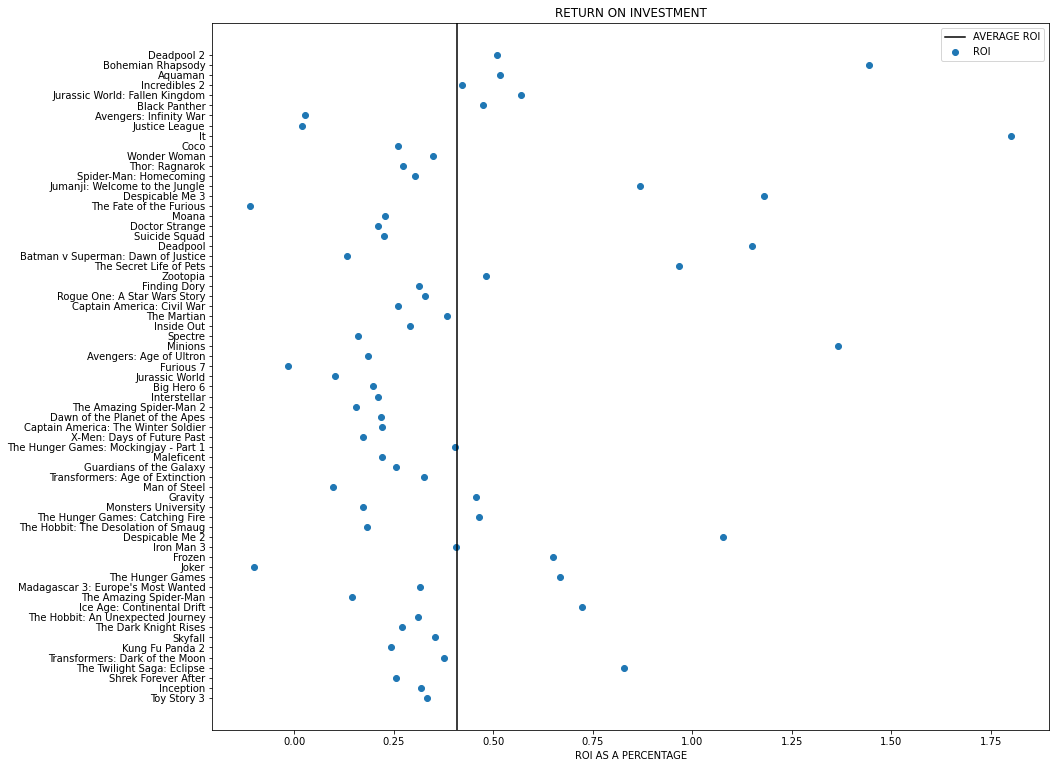

In [44]:
fig, ax = plt.subplots(figsize = (15, 13)) # create figure for plot

height = roi_finder(df5) # find ROI of films
y = df5['title'] # set y axis to titles
height_mean = sum(height) / len(height) # find mean of x values 
ax.axvline(height_mean, color = 'black') # place average line
plt.scatter(height, y) # create plot
ax.set_title('RETURN ON INVESTMENT') # title plot
ax.set_xlabel('ROI AS A PERCENTAGE') # label axis
plt.legend(['AVERAGE ROI', 'ROI']) # create legend
plt.show(); # output

The scatter plot above shows the ROI for each film. Here the higher the better. Black panther has a ROI of about .47 or 47%.
We can, however see that *IT* has an exceptionaly high roi, with a budget of 35 million, but a return of over 665 million. This movie does have a significantly higher budget then the average, but is definantly an anomaly, along with films such as *Bohemian Rhapsody*, *The Minions* and *Despicable Me 3*.

In [45]:
top_roi = df5.sort_values(by = 'ROI', ascending = False)[:25] # create sorted list of top ROI

In [46]:
top_roi.head() # view first five entries of top_roi

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
66,It,WB (NL),327500000.00,372900000.00,2017,700400000.00,tt1396484,It,2017,135.00,"Horror,Thriller",7.40,359123,85,2017-09-08,35000000.00,665400000.00,1.80
73,Bohemian Rhapsody,Fox,216400000.00,687200000.00,2018,903600000.00,tt1727824,Bohemian Rhapsody,2018,134.00,"Biography,Drama,Music",8.00,345466,48,2018-11-02,55000000.00,848600000.00,1.44
39,Minions,Uni.,336000000.00,823400000.00,2015,1159400000.00,tt2293640,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,193917,19,2015-07-10,74000000.00,1085400000.00,1.37
57,Despicable Me 3,Uni.,264600000.00,770200000.00,2017,1034800000.00,tt3469046,Despicable Me 3,2017,89.00,"Adventure,Animation,Comedy",6.30,92580,35,2017-06-30,75000000.00,959800000.00,1.18
52,Deadpool,Fox,363100000.00,420000000.00,2016,783100000.00,tt1431045,Deadpool,2016,108.00,"Action,Adventure,Comedy",8.00,820847,68,2016-02-12,58000000.00,725100000.00,1.15


### Recommendation

- Budget: approx. 16 million or less.

- Reason: This number is the averege budget for the top 25 films by revenue. Exceeding this number could result in lower revenue, and going above this number appears to not have much of an impact on overal success. 

## Gross Income

Lets see how gross income between domestic and foreign effect things. We'll take the top 5 for this demonstration.

In [47]:
top_5 = top_25.sort_values(by = 'total_revenue', ascending = False)[:5] # create srtoed list of top 5 by total revenue

In [48]:
top_5['title'] # show titles of top_5 df

69                     Black Panther
70    Jurassic World: Fallen Kingdom
16                            Frozen
39                           Minions
71                     Incredibles 2
Name: title, dtype: object

One thing worth noting here, 60% of these films are of a series / sequel .Could creating movies that are connected be helpful to overall success?

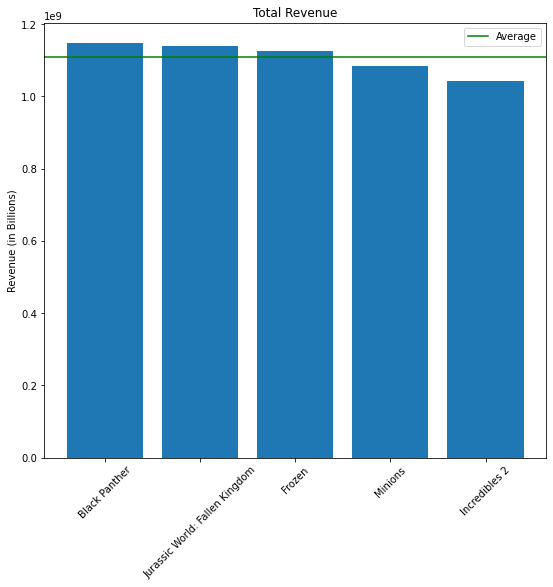

In [49]:
fig, ax = plt.subplots(figsize = (9,8)) # create figure for plot

height = top_5['total_revenue'] # assign variable for total revenue numbers
x = range(len(height)) # set equaly spaced locations for variables
labels = top_5['title'] # create labels
height_mean = round(sum(height) / len(height)) # find average of total_revenue
ax.axhline(height_mean, color = 'green') # place average line
ax.bar(x, height, tick_label = labels) # create plot
ax.set_title('Total Revenue') # title
ax.set_ylabel('Revenue (in Billions)') # label axis
ax.set_xticklabels(labels, rotation = 45) # rotate lables for readability
plt.legend(['Average']) # create legend
plt.show(); # output

### Domestic vs Foreign gross

Lets look into how these films fair domestic vs foreign, and see if the locations these films are shown effects gross revenue

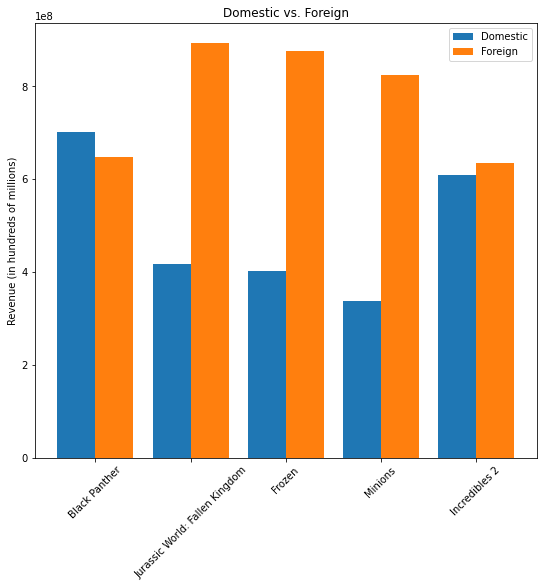

In [50]:
fig, ax = plt.subplots(figsize = (9,8))
y1 = top_5['domestic_gross'] # assign variable for domestic gross numbers
y2 = top_5['foreign_gross'] # assign variable for foreign gross numbers
x = np.arange(len(y1)) # create evenly spaced loacations for variables
width = 0.40 # reduce bar width to prevent overlap
plt.bar(x-0.2, y1,width) # place y1 bars
plt.bar(x+0.2,y2,width) # place y2 bars
plt.xticks(x, top_5['title']) # place titles names
ax.set_title('Domestic vs. Foreign') # title plot
ax.set_ylabel('Revenue (in hundreds of millions)') # label axis
ax.set_xticklabels(labels, rotation = 45) # rotate titles for readability
plt.legend(['Domestic', 'Foreign']) # create legend
plt.show(); # output

Foreign gross wins out with every movie except black panter. This isn't as surprising as you initially may think. While Domestic (USA) is a very large population, Foreign includes mostly the entire rest of the globe. This just goes to show that, while the USA market is very important, the global market is just as, if not more important. 

___
# Genre

Next, lets look into genre and see how much the type of film being produced effects its overall success.

In [51]:
top_5.head() # view first five of df

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
69,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148,10,2018-02-16,200000000.00,1147000000.00,0.47
70,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125,13,2018-06-22,170000000.00,1139500000.00,0.57
16,Frozen,BV,400700000.00,875700000.00,2013,1276400000.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311,14,2013-11-22,150000000.00,1126400000.00,0.65
39,Minions,Uni.,336000000.00,823400000.00,2015,1159400000.00,tt2293640,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,193917,19,2015-07-10,74000000.00,1085400000.00,1.37
71,Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00,tt3606756,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,203510,16,2018-06-15,200000000.00,1042800000.00,0.42


Above, we can see a lot more information regarding rating, genres and even how many votes were cast for the ratings. Lets pull up the top grossing films from before and see what genre they are.

In [52]:
top_5[top_5['title'] == 'Black Panther'] # view Black Panther entry

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
69,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148,10,2018-02-16,200000000.00,1147000000.00,0.47


In [53]:
top_5[top_5['title'] == 'Jurassic World: Fallen Kingdom'] # view Jurassic World: Fallen Kingdom entry

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
70,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125,13,2018-06-22,170000000.00,1139500000.00,0.57


In [54]:
top_5[top_5['title'] == 'Frozen'] # view Frozen entry

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
16,Frozen,BV,400700000.00,875700000.00,2013,1276400000.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311,14,2013-11-22,150000000.00,1126400000.00,0.65


In [55]:
top_5[top_5['title'] == 'Minions'] # view Minions entry

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
39,Minions,Uni.,336000000.00,823400000.00,2015,1159400000.00,tt2293640,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,193917,19,2015-07-10,74000000.00,1085400000.00,1.37


In [56]:
top_5[top_5['title'] == 'Incredibles 2'] # view Incredibles 2 entry

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
71,Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00,tt3606756,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,203510,16,2018-06-15,200000000.00,1042800000.00,0.42


We can definitely see a trend here, with the top 5 being a combination of mostly action, adventure or sci-fi. Lets do a little digging into what the top genres are by entry count. 

In [57]:
df2['genres'].value_counts().head(6) # view top six genre entries by count 

genres
Drama           11612
Documentary     10313
Comedy           5613
Horror           2692
Comedy,Drama     2617
Thriller         1555
Name: count, dtype: int64

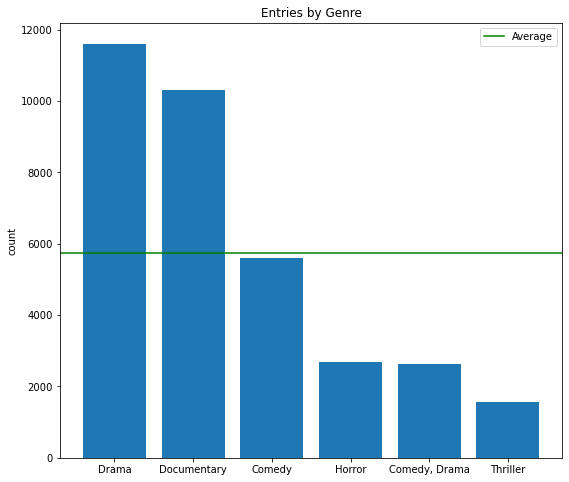

In [58]:
fig, ax = plt.subplots(figsize = (9,8)) # create figure for plot

height = [11612, 10313, 5613, 2692, 2617, 1555] # assign variables for genres
x = range(len(height)) # creat evenly spaced locations for variables
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller'] # create labels 
height_mean = round(sum(height) / len(height)) # find average of entries for genre
ax.axhline(height_mean, color = 'green') # place average line
ax.bar(x, height, tick_label = labels) # create plot
ax.set_title('Entries by Genre') # title 
ax.set_ylabel('count') # label axis
plt.legend(['Average']) # create legend
plt.show(); # output

We can see above, that none of the genres our top movies are crack the top 6 of entries. Lets see how they compare to the top entries.

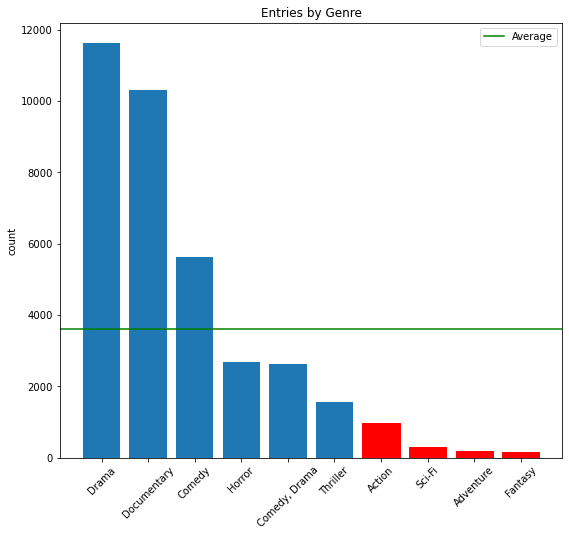

In [59]:
fig, ax = plt.subplots(figsize = (9,8)) # create figure for plot

height = [11612, 10313, 5613, 2692, 2617, 1555, 979, 295, 176, 147] # assign variables for genres
x = range(len(height)) # create evenly spaced locations for variables
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller', 'Action', 'Sci-Fi', 'Adventure', 'Fantasy']
# create labels 
height_mean = round(sum(height) / len(height)) # find average of entries for genre
ax.axhline(height_mean, color = 'green') # place average line
bar_list = ax.bar(x, height, tick_label = labels) # create plot
bar_list[6].set_color('r') # change color of bar
bar_list[7].set_color('r') # change color of bar
bar_list[8].set_color('r') # change color of bar
bar_list[9].set_color('r') # change color of bar
ax.set_xticklabels(labels, rotation = 45) # rotate titles for readability
ax.set_title('Entries by Genre') # title
ax.set_ylabel('count') # lebel axis
plt.legend(['Average']) # create legend
plt.show(); # output

It's a little odd how the seemingly most popular films dont actually have that many films (comparatively) to other genres. This may be something to note, as this could be a sign of a market that doesnt have many competators, and it could be wise to jump into the market ahead of other studios.  

Now lets mix together genre and total gross to see if we can notice any interesting trends. We will do this by looking into the top 100 by gross, and seeing what genres they are.

In [60]:
df3.head() # view top five of dataframe

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00,tt0435761,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",8.30,682218
1,Inception,WB,292600000.00,535700000.00,2010,828300000.00,tt1375666,Inception,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00,tt0892791,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",6.30,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,698500000.00,tt1325004,The Twilight Saga: Eclipse,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,623900000.00,tt1228705,Iron Man 2,2010,124.00,"Action,Adventure,Sci-Fi",7.00,657690


In [61]:
top_100g = df3.sort_values(by = 'total_gross', ascending = False)[:100] # create list of top 100 by total gross

In [62]:
top_100g.head() # view first five of dataframe

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1618,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00,tt2395427,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,665594
2752,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148
2435,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,462903
2753,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125
952,Frozen,BV,400700000.00,875700000.00,2013,1276400000.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311


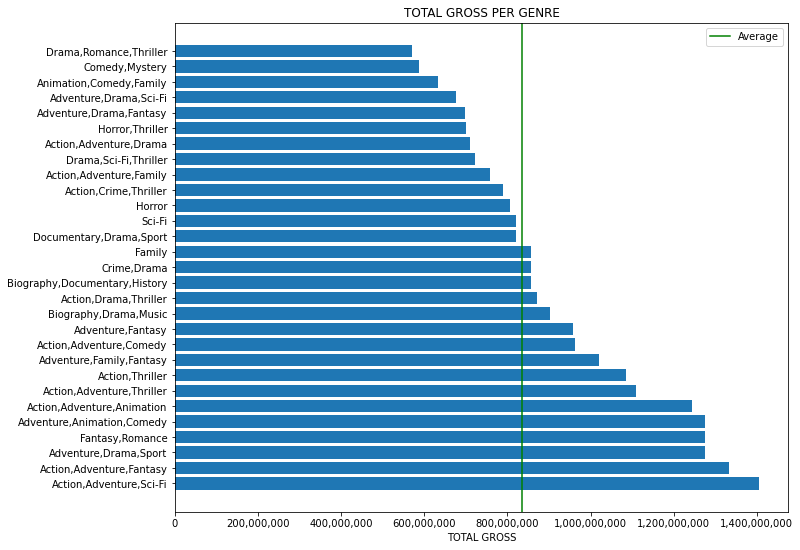

In [63]:
fig, ax = plt.subplots(figsize = (11, 9)) # create figure for plot

x = top_100g['total_gross'] # assign variables for total gross
y = top_100g['genres'] # assign variables for genres
ax.set_xlabel('TOTAL GROSS') # label axis
height_mean = round(sum(x) / len(x)) # find average of total gross
ax.axvline(height_mean, color = 'green') # place average line
plt.legend(['Average']) # create legend
ax.set_title('TOTAL GROSS PER GENRE')
ax.barh(y,x) # create plot
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show(); # output

We can see here that almost all past the average line are action or adventure. This is a clear indication that action, adventure films are in the spotlight at the moment, and are definitely worth being the main focus when it comes to genre choice.

## Type of story

The type of story within the genre can also have a huge impact on how well the audiance connects with the film. In this section, we'll take a look into the most popular story types, and ensure they are integrated into the films that are produced.

## Recommended Story Archetype
###  Monomyth or Hero's Journey
    - consists of generally 12 stages
        - Ordinary World
            - Shows the hero in their mundane world, usually hinting that anyone can become a hero
        - Call to Adventure
            - presents the hero with the challenge ahead and changes the world the hero knows and understands
        - Refusal of the Call
            - Here is where the hero second guesses their abilities, and has to make the decision to move forward
        - Meeting the Mentor
            - After they decided to answer the call, often a mentor will be presented to teach the hero the necessary skills
        - Crossing the Threshold
            - This is where the hero crosses a threshold where return to before is imposible. This creates consequenses.
        - Tests, Allies, Enemies
            - The hero is tested, allys are met and enemies are created
        - Approach to the Inmost Cave
            - the hero nears the ultimate objective
        - The Ordeal
            - The hero finally reaches the objective, but usually is changed after, ready for new challenges
        - Reward
            - The hero seizes the moment to enjoy all the hard work to get to this point
        - The Road Back
            - The herre realizes the consiquenses of their actions, and must choose to fight, or give up
        - Resurrection
            - The hero faces one moe challenge, using everything learned so far
        - Return home
            - The hero finally returns back to normal life, changed forver 

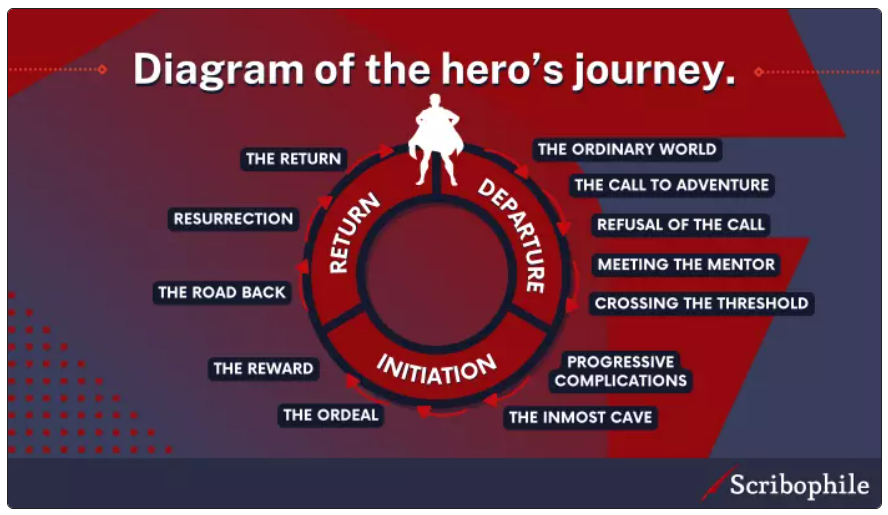

An over whelming amount of movies follow this story archetype, and is one of the oldest archetypes known. Blockbusters like *Harry potter*, *Star Wars* and *The Avengers* all follow this formula. Even the bible stays true to this archetype. For this reason, The Hero's Journey is the recommended type of story. 

Source: [Story Archetypes: 50+ Plot Archetypes to Craft Your Narrative](https://www.scribophile.com/academy/what-are-story-archetypes#the-ultimate-list-of-story-archetypes) by Fija Callaghan

### Recommendation:

- Action, Adventure or sci_fi film (or a mixture of 2 or 3 of these genres)
    - Follow the hero's Journey as this maximises audiances and is a comfortable story for fans

## Rating

Ratings are an important metric that most studios and customers value. Lets look into the ratings of our top 6 genres  

Utilized Function:

`get_g_rating`

This function finds the average rating for a specified genre.

In [64]:
get_g_rating('Drama') # average rating for drama

6.49

In [65]:
get_g_rating('Documentary') # average rating for documentary

7.29

In [66]:
get_g_rating('Comedy') # average rating for comedy

5.78

In [67]:
get_g_rating('Horror') # average rating for horror

4.84

In [68]:
get_g_rating('Comedy,Drama') # average rating for comedy, drama

6.36

In [69]:
get_g_rating('Thriller') # average rating for thriller

5.7

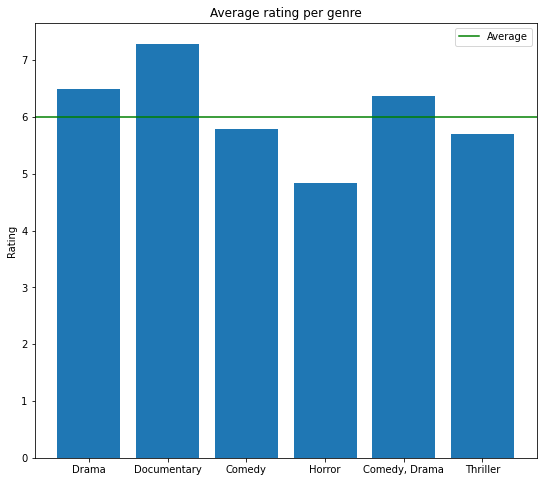

In [70]:
fig, ax = plt.subplots(figsize = (9,8)) # create figure for plot

height = [6.49, 7.29, 5.78, 4.84, 6.36, 5.7] # assign variables for average ratings
x = range(len(height)) # create evenly spaced locations for variables
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller'] # assign labels
height_mean = round(sum(height) / len(height)) # find average of ratings
ax.axhline(height_mean, color = 'green') # place average line
ax.bar(x, height, tick_label = labels) # create plot
ax.set_title('Average rating per genre') # title
ax.set_ylabel('Rating') # label axis
plt.legend(['Average']) # create legens
plt.show(); # output

We can see that Documantary has the highest average rating for the top 6, with most falling close behined. 

Lets see how the genres of our top movies compare.

In [71]:
# show specific rating for The Avengers
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'The Avengers'
''',conn)

,primary_title,genres,averagerating
0,The Avengers,"Action,Adventure,Sci-Fi",8.10


In [72]:
# show specific rating for Avengers: Age of Ultron
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Avengers: Age of Ultron'
''',conn)

,primary_title,genres,averagerating
0,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.30


In [73]:
# show specific rating for Black Panther
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Black Panther'
''',conn)

,primary_title,genres,averagerating
0,Black Panther,"Action,Adventure,Sci-Fi",7.30


In [74]:
# show specific rating for Harry Potter and the Deathly Hallows: Part 2
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Harry Potter and the Deathly Hallows: Part 2'
''',conn)

,primary_title,genres,averagerating
0,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy",8.10


In [75]:
# show specific rating for Star Wars: The Last Jedi
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Star Wars: The Last Jedi'
''',conn)

,primary_title,genres,averagerating
0,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",7.10


In [76]:
get_g_rating('Sci-Fi') # find avarage rating for Sci-Fi

5.44

In [77]:
get_g_rating('Action') # find avarage rating for Action

5.76

In [78]:
get_g_rating('Adventure') # find avarage rating for Adventure

6.27

In [79]:
get_g_rating('Fantasy') # find avarage rating for Fantasy

6.2

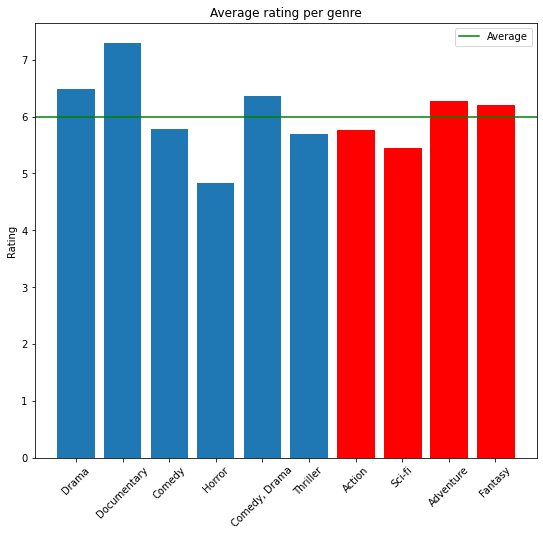

In [80]:
fig, ax = plt.subplots(figsize = (9,8)) # create figure for plot

height = [6.49, 7.29, 5.78, 4.84, 6.36, 5.7, 5.76, 5.44, 6.27, 6.2] # assign variables for ratings
x = range(len(height))
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller','Action', 'Sci-fi', 'Adventure', 'Fantasy']
# create labels
height_mean = round(sum(height) / len(height)) # find average of ratings 
ax.axhline(height_mean, color = 'green') # place average line 
bar_list = ax.bar(x, height, tick_label = labels) # create plot
bar_list[6].set_color('r') # change color of bar
bar_list[7].set_color('r') # change color of bar
bar_list[8].set_color('r') # change color of bar
bar_list[9].set_color('r') # change color of bar
ax.set_xticklabels(labels, rotation = 45) # rotate title for readability
ax.set_title('Average rating per genre') # title
ax.set_ylabel('Rating') # label axis
plt.legend(['Average']) # create legend
plt.show(); # output

Here we can see something interesting, with the genres of the top movies by gross revenue having a similar rating as the genres by entry count. Its starting to look like creating films in these top genres are becoming over saturated as genres with less films are gaining popularity. 

None of the top movies by gross have a rating below a 7, but also none above 9. Lets see the movies that scored a 9 or above and see if theres any information there to be gathered.

In [81]:
# find entries with an averag rating equal to or above 9
pd.read_sql('''
select primary_title, averagerating, genres
from movie_basics
join movie_ratings
using (movie_id)
where averagerating >= 9
''',conn)

,primary_title,averagerating,genres
0,Mzungu (n.) White-Wanderer,9.20,"Adventure,Documentary,Drama"
1,We Are EC: The Untold Story of East Chicago Ba...,9.40,Documentary
2,The Road Forward,9.20,Documentary
3,One Angry Vegan,9.10,Documentary
4,British Winters,9.20,Drama
...,...,...,...
1421,Jersey,9.00,"Drama,Sport"
1422,Zulu Summer,9.30,Documentary
1423,Just One More Kiss,9.00,"Drama,Romance"
1424,Postal,9.30,Comedy


Just from this quick glance, we can see that a large amount of titles that scored a 9 or higher are documentaries. This is where a series could be more valuable. Movies within the marvel cinimatic Universe could be recieving a lower average rating but generating more income because one movie creates 'hype' for the next, allowing a snowball effect to take place where the customer sees a movie they like and becomes interested in that field, and becomes more likely to see a sequel or a title within the same universe.

---
# Theatrical Release

The time of year can have a major impact on the success of a product. This is mostly seen in the gaming market, where large AAA (Triple A) games release around the holiday season (Christmas) to maximise purchasers. Lets dive into Theatrical releases of films and see if a similar pattern can be noticed. 

In [82]:
df5.head() # view first five entries of dataframe

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,index,date,budget,total_revenue,ROI
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00,tt0435761,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",8.30,682218,30,2010-06-18,200000000.00,867000000.00,0.33
1,Inception,WB,292600000.00,535700000.00,2010,828300000.00,tt1375666,Inception,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066,59,2010-07-16,160000000.00,668300000.00,0.32
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00,tt0892791,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",6.30,167532,74,2010-05-21,165000000.00,587600000.00,0.26
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,698500000.00,tt1325004,The Twilight Saga: Eclipse,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733,83,2010-06-30,68000000.00,630500000.00,0.83
4,Transformers: Dark of the Moon,P/DW,352400000.00,771400000.00,2011,1123800000.00,tt1399103,Transformers: Dark of the Moon,2011,154.00,"Action,Adventure,Sci-Fi",6.20,366409,24,2011-06-29,195000000.00,928800000.00,0.38


In [83]:
df5 = df5.drop(56) # remove an entry that is not needed

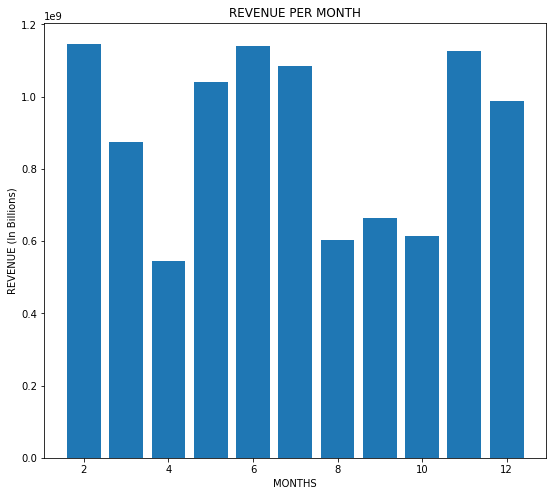

In [84]:
fig, ax = plt.subplots(figsize = (9, 8)) # create figure for plot

x = df5['date'].dt.month # assign varaibles for date
y = df5['total_revenue'] # assign variables for total revenue
ax.set_xlabel('MONTHS') # label axis
ax.set_ylabel('REVENUE (In Billions)') # label axis
ax.set_title('REVENUE PER MONTH') # title
ax.bar(x,y) # create plot
plt.show(); # output

Above we can see an interesting pattern, with a rise in revenue towards the beginning and ends of the year (holiday season) but also a rise in sales towards the middle of the year. lets see how many movies are released in these time frames to hopefully gain some insight into why this pattern emerges.

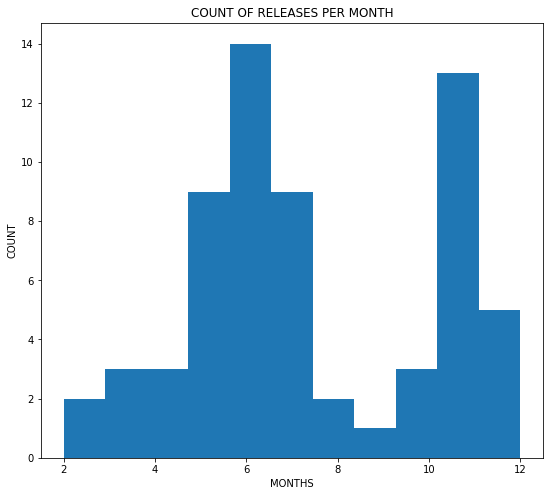

In [85]:
fig, ax = plt.subplots(figsize = (9, 8)) # create figure for plot

x = df5['date'].dt.month  # assign varaibles for date
ax.set_xlabel('MONTHS') # label axis
ax.set_ylabel('COUNT') # label axis
ax.set_title('COUNT OF RELEASES PER MONTH') # title
ax.hist(x, bins = 11) # create plot
plt.show(); # output

In [86]:
df5['date'].dt.month.value_counts().sort_index() # view months in order with amount of entries

date
2      2
3      3
4      3
5      9
6     14
7      9
8      2
9      1
10     3
11    13
12     5
Name: count, dtype: int64

Here, we can see that most films are released either in the middle of the year, or the end of the year. The reasoning here is fairly simple, as the end of the year is the holiday season, where families and friends are more likely to get together and go out to do things. This is also the time when people are most likely to spend money. For the middle of the year, this is when the weather gets nicer and people start going out more, resulting in more potential customers. Janurary also appears to be an untapped market, as the top films dont release in this time frame. It could be a risk to release in this time, but could  result in a sort of 'monopoly' of this month for large budget films.

---
# Recommendation

### My recommendation is as follows:

Create a film following the hereo's Journey, where the protagonist is tested several times thoughout their story arc and eventually prevails against all odds and against all enemies. The hero will eventually return home a different person, reflecing on their quest so far. This story should have action adventure themes and should have a budget around 166 million, to maximise the quality of the product while still staying profitable. This film should be released either around the Christmas holiday season or during the middle of the year to capitalize on potential profits.

___
# Summary

- Budget
    - maintain a budget around 166 million to maximise profit and minimise risk
- Genre
    - Action/Adventure/Sci-Fi
        - follow the hero's journey
- Release time
    - release films near the holiday (chrsitmas) season or mid year during summer